In [1]:
#Import  Modules
import os
from glob import glob

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import seaborn as sns
import numpy as np
import numpy.ma as ma
from shapely.geometry import mapping, box
import xarray as xr
from rasterio.plot import plotting_extent
import rioxarray as rxr
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio


In [2]:
# Create the path to your data using a for loop

landsat_post_fire_files = []

for root, dirs, files in os.walk("./Postdata/crop"):
    for filename in files:
        landsat_post_fire_files.append("./Postdata/crop/" + filename)

landsat_post_fire_files

['./Postdata/crop/band10clip.tif',
 './Postdata/crop/band11clip.tif',
 './Postdata/crop/band1clip.tif',
 './Postdata/crop/band2clip.tif',
 './Postdata/crop/band3clip.tif',
 './Postdata/crop/band4clip.tif',
 './Postdata/crop/band5clip.tif',
 './Postdata/crop/band6clip.tif',
 './Postdata/crop/band7.tif',
 './Postdata/crop/band8clip.tif',
 './Postdata/crop/band9clip.tif']

In [3]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
     
    return xr.concat(out_xr, dim="Band") 

In [4]:
# Import and stack post fire Landsat data - notice you are only stacking bands 5-7 for the NBR Images
# Retrieve bands 5->7 from directory
desired_bands = landsat_post_fire_files[6:9]

desired_bands

plt.show()

In [5]:
#Sort the bands and combine them together.
desired_bands.sort()

landsat_post_fire = combine_tifs(desired_bands)

#Use the extent of the Landsat Images to be the same as the NBR map output.
extent_landsat = plotting_extent(
    landsat_post_fire[0].values, landsat_post_fire.rio.transform())

landsat_post_fire

<xarray.DataArray (Band: 3, y: 716, x: 691)>
array([[[15471., 15686., 14953., ...,     0.,     0.,     0.],
        [15691., 16315., 15557., ...,     0.,     0.,     0.],
        [    0., 16215., 15776., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]],

       [[11550., 11679., 11817., ...,     0.,     0.,     0.],
        [11691., 11820., 11746., ...,     0.,     0.,     0.],
        [    0., 11957., 11712., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]],

       [[ 8283.,  8365.,  8637., ...,     0.,     0.,     0.],
        [ 8315.,  8253.,  8399., ...,     0.,     0.,     0.],
        [    0.,  8292.,  8241., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]]])
Coordinates:
    band         (Band) int32 1 2 3
  * y            (y) float64 4.391e+06 4.391e+06 4.391e+06 ... 4.37e+06 4.37e+06
  * x            (x) float64 5.285e+05 5.285e+05 ... 5.492e+05 5.492e+05
    spatial_ref  int32 0
Dimensions without coordinates: Band
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [7]:
# Open fire boundary layer and reproject it to match the Landsat data

landsat_fire_perimeter_file = "./FireShapefile/Chrome2_Fire.shp"

fire_boundary = gpd.read_file(landsat_fire_perimeter_file)

# If the CRS are not the same, be sure to reproject
fire_bound_utmz13 = fire_boundary.to_crs(landsat_post_fire.rio.crs)

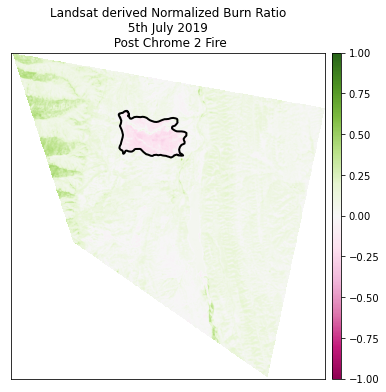

In [58]:
# Calculate NBR 
landsat_postfire_nbr = (
    landsat_post_fire[0]-landsat_post_fire[2]) / (landsat_post_fire[0]+landsat_post_fire[2])

#Plot the Resulting NBR 
fig, ax = plt.subplots(figsize=(12, 6))

ep.plot_bands(landsat_postfire_nbr,
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              ax=ax,
              extent=extent_landsat,
              title="Landsat derived Normalized Burn Ratio\n 5th July 2019 \n Post Chrome 2 Fire")

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                        edgecolor='black',
                       linewidth=2)
plt.show()

In [9]:
#Repeat the Process for the prefire Data

In [19]:
# Create the path to your data

landsat_pre_fire_files = []

for root, dirs, files in os.walk("./Predata/crop"):
    for filename in files:
        landsat_pre_fire_files.append("./Predata/crop/" + filename)

landsat_pre_fire_files

['./Predata/crop/band10afterclip.tif',
 './Predata/crop/band11afterclip.tif',
 './Predata/crop/band1afterclip.tif',
 './Predata/crop/band2afterclip.tif',
 './Predata/crop/band3afterclip.tif',
 './Predata/crop/band4afterclip.tif',
 './Predata/crop/band5afterclip.tif',
 './Predata/crop/band6afterclip.tif',
 './Predata/crop/band7afterfireclip.tif',
 './Predata/crop/band8afterfireclip.tif',
 './Predata/crop/band9afterclip.tif']

In [20]:
def combine_tifs(tif_list):
    """A function that combines a list of tifs in the same CRS
    and of the same extent into an xarray object

    Parameters
    ----------
    tif_list : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An xarray object with all of the tif files in the listmerged into 
    a single object.

    """

    out_xr=[]
    for i, tif_path in enumerate(tif_list):
        out_xr.append(rxr.open_rasterio(tif_path, masked=True).squeeze())
        out_xr[i]["band"]=i+1
     
    return xr.concat(out_xr, dim="Band")

In [21]:
# Import and stack post fire Landsat data - notice you are only stacking bands 5-7 for the NBR Images

# Retrieve bands 5-7 from directory
prefire_desired_bands = landsat_pre_fire_files[6:9]




plt.show()

In [22]:
#Sort the bands and combine them together.
prefire_desired_bands.sort()

landsat_pre_fire = combine_tifs(prefire_desired_bands)

#Use the extent of the Landsat Images to be the same as the NBR map output.
extent_landsat = plotting_extent(
    landsat_pre_fire[0].values, landsat_pre_fire.rio.transform())

landsat_pre_fire

<xarray.DataArray (Band: 3, y: 716, x: 691)>
array([[[12562., 12870., 12681., ...,     0.,     0.,     0.],
        [13174., 13536., 13251., ...,     0.,     0.,     0.],
        [    0., 13544., 13283., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]],

       [[10237., 10476., 10553., ...,     0.,     0.,     0.],
        [10312., 10589., 10507., ...,     0.,     0.,     0.],
        [    0., 10690., 10489., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]],

       [[ 7736.,  7906.,  7998., ...,     0.,     0.,     0.],
        [ 7711.,  7826.,  7831., ...,     0.,     0.,     0.],
        [    0.,  7846.,  7775., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.],
        [    0.,     0.,     0., ...,     0.,     0.,     0.]]])
Coordinates:
    band         (Band) int32 1 2 3
  * y            (y) float64 4.391e+06 4.391e+06 4.391e+06 ... 4.37e+06 4.37e+06
  * x            (x) float64 5.285e+05 5.285e+05 ... 5.492e+05 5.492e+05
    spatial_ref  int32 0
Dimensions without coordinates: Band
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    grid_mapping:  spatial_ref

In [23]:
# Open fire boundary layer and reproject it to match the Landsat data
fire_boundary_path = os.path.join("FireShapefile",
                                  "Chrome2_Fire.shp")

fire_boundary = gpd.read_file(fire_boundary_path)

# If the CRS are not the same, be sure to reproject
fire_bound_utmz13 = fire_boundary.to_crs(landsat_pre_fire.rio.crs)

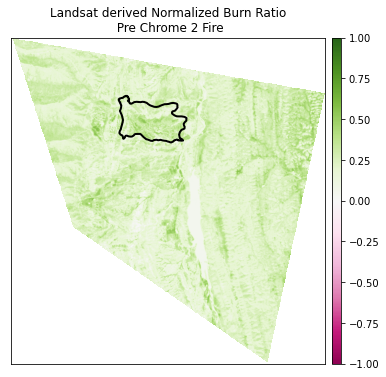

In [59]:
# Calculate NBR & plot
landsat_prefire_nbr = (
    landsat_pre_fire[0]-landsat_pre_fire[2]) / (landsat_pre_fire[0]+landsat_pre_fire[2])

fig, ax = plt.subplots(figsize=(12, 6))

ep.plot_bands(landsat_prefire_nbr,
              cmap='PiYG',
              vmin=-1,
              vmax=1,
              ax=ax,
              extent=extent_landsat,
              title="Landsat derived Normalized Burn Ratio\n Pre Chrome 2 Fire")

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)
plt.show()

In [28]:
#Calculate the dNBR and Print the Results
dnbr_landsat = landsat_prefire_nbr - landsat_postfire_nbr

dnbr_landsat

<xarray.DataArray (y: 716, x: 691)>
array([[-0.06484425, -0.06546529, -0.04127894, ...,         nan,
                nan,         nan],
       [-0.04568123, -0.06085337, -0.04170644, ...,         nan,
                nan,         nan],
       [        nan, -0.05690922, -0.0521728 , ...,         nan,
                nan,         nan],
       ...,
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]])
Coordinates:
  * y            (y) float64 4.391e+06 4.391e+06 4.391e+06 ... 4.37e+06 4.37e+06
  * x            (x) float64 5.285e+05 5.285e+05 ... 5.492e+05 5.492e+05
    spatial_ref  int32 0

In [29]:
# View min and max values in the dNBR data - This will be used to create the Classification classes
print('CHM min value:', np.nanmin(dnbr_landsat))
print('CHM max value:', np.nanmax(dnbr_landsat))

CHM min value: -0.24917157102015083
CHM max value: 0.7909597351737288


In [76]:
#Defining the Classification classes based on the min and max values
class_bins = [-np.inf, -0.2, -0.1, 0.1, 0.5, 0.7, np.inf]


In [77]:
# Use the above classes to classify the maps
dnbr_landsat_class = xr.apply_ufunc(np.digitize,
                                    dnbr_landsat,
                                     class_bins)

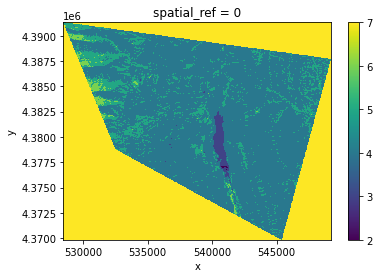

In [78]:
# Print a classfied map--- Values of 7 represent missing data 
im = dnbr_landsat_class.plot.imshow()
ax.set_axis_off()

In [84]:
# Mask out values not equal to 7
dnbr_landsat_class_ma = dnbr_landsat_class.where(dnbr_landsat_class != 7)
dnbr_landsat_clss_ma

<xarray.DataArray (y: 716, x: 691)>
array([[ 5.,  5.,  5., ..., nan, nan, nan],
       [ 5.,  5.,  5., ..., nan, nan, nan],
       [nan,  5.,  5., ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 4.391e+06 4.391e+06 4.391e+06 ... 4.37e+06 4.37e+06
  * x            (x) float64 5.285e+05 5.285e+05 ... 5.492e+05 5.492e+05
    spatial_ref  int32 0

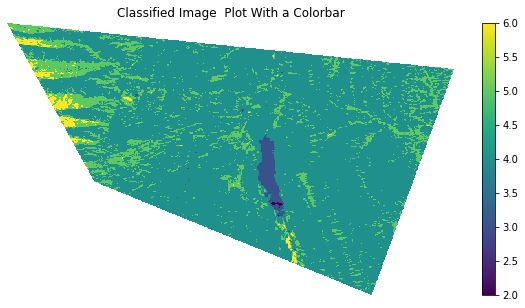

In [85]:
# Plot newly classified and masked raster
f, ax = plt.subplots(figsize=(10,5))
dnbr_landsat_class_ma.plot.imshow()
ax.set(title="Classified Image  Plot With a Colorbar")

ax.set_axis_off()
plt.show()

In [86]:
dnbr_cat_names = ["Enhanced Regrowth",
                  "Unburned",
                  "Low Severity",
                  "Moderate Severity",
                  "High Severity"]

nbr_colors = ["g",
              "yellowgreen",
              "peachpuff",
              "coral",
              "maroon"]
nbr_cmap = ListedColormap(nbr_colors)

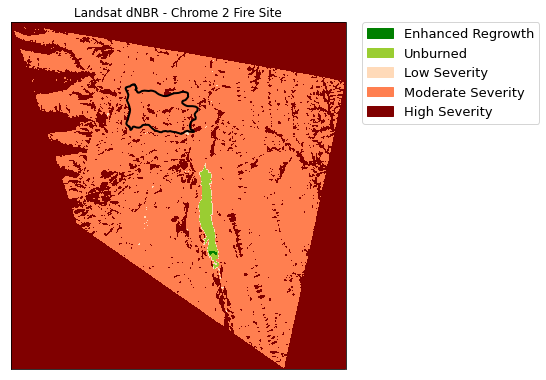

In [91]:
 #Plot the data with a legend and include the Chrome 2 fire perimeter. 

dnbr_landsat_class_plot = ma.masked_array(
    dnbr_landsat_class.values, dnbr_landsat_class.isnull())

fig, ax = plt.subplots(figsize=(6, 8))

fire_bound_utmz13.plot(ax=ax,
                       color='None',
                       edgecolor='black',
                       linewidth=2)

classes = np.unique(dnbr_landsat_class_plot)
classes = classes.tolist()[:5]

ep.plot_bands(dnbr_landsat_class_plot,
              cmap=nbr_cmap,
              vmin=2,
              vmax=5,
              title="Landsat dNBR - Chrome 2 Fire Site",
              cbar=False,
              scale=False,
              extent=extent_landsat,
              ax=ax)

ep.draw_legend(im_ax=ax.get_images()[0],
               classes=classes,
               titles=dnbr_cat_names)

plt.show()